# Q&A Activity Question Week -09

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
#Reading the dataset
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1. Explain the dataset

In [3]:
#printing the column names
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
#Chcking the total number of rows and columns in our dataset
data.shape

(200, 5)

In [5]:
#Checking if any null values present or not
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
#Getting info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


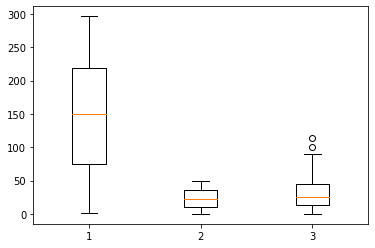

In [7]:
#Plotting Box plot
plt.boxplot(x=data[['TV','Radio','Newspaper']])
plt.show()

<AxesSubplot:>

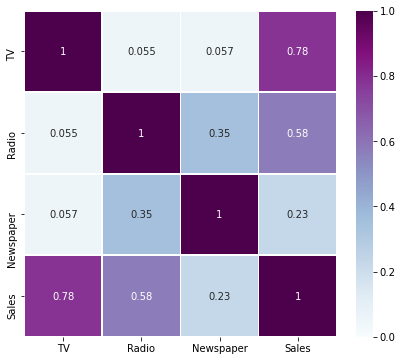

In [8]:
#Plotting correlation using heatmap
corr = data.corr()
plt.figure(figsize=(7,6))
sns.heatmap(data.drop('Unnamed: 0',axis=1).corr(), vmin=0, vmax=1, linewidth=0.8, annot=True,cmap="BuPu")

The above heatmap shows that TV has the highest positive correlation with Sales, while newspapers have the lowest.

## 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [9]:
#Getting the statistical values for our dataset
data.drop('Unnamed: 0', axis =1).describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The table above shows that the mean, the minimum, the maximum, the median, and the standard deviation are lowest for radio and highest for television.As a result, we can conclude that television is the most expensive mode of advertising and radio is the least expensive.

## 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

In [10]:
#Taking H0 :null hypothesis and H1 :alternative hypothesis

H0 : There is no significant difference between the amount spent on all three advertisements.

H1 :A significant difference exists between the amounts spent on at least one advertisement compared to the rest.

In [11]:
#We are using ANOVA Test and level of significance alpha : .05
#importing f_oneway from scipy.stats lib.
from scipy.stats import f_oneway

In [12]:
f_statistic,p_value=stat.f_oneway(data['TV'],data['Radio'],data['Newspaper'])

In [13]:
print(f_statistic)

358.8514595342597


In [14]:
print(p_value)

4.552931539744962e-103


In [15]:
#If we round off the p value we wil get zero.

In [16]:
round(p_value)

0

In [17]:
if p_value<0.05:
    print(" Since P value",p_value,"is less than .05(alpha value), we can reject the null hypothesis")
else:
    print(" Since P value",p_value,"is greater than .05(alpha value), we cant reject the null hypothesis")

 Since P value 4.552931539744962e-103 is less than .05(alpha value), we can reject the null hypothesis


Hense, we can conclude that there is a significant difference exist between the amounts spent on atleast one advertisement compared to the others.